In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

In [2]:
data_path = 'bike_sharing/bike_hour.csv'

bikes = pd.read_csv(data_path)
bikes = bikes.drop(['casual', 'registered', 'instant'], axis=1)

# Bikes Linear Regression Practice

### The Data
The data set loaded above records the number of bike rentals over the course of one day at a particular hour, encoded as (year, month, hour). (In addition to these) it contains the following features:
 - season
 - yr
 - month
 - hr
 - holiday = indicates whether the day was a holiday (not the same as not(workingday))
 - workingday = whether people would have to go to work that day
 - weathersit = one of four categories indicating how shit the weather was
 - temp = actual temperature, normalised to be between 0 and 1. 
 - atemp = felt temperature, normalised to same scale as temp
 - hum = air humidity
 - windspeed
 - cnt = nr of bike rentals in that period

### The Task
The goal of this practice exercise is to create a linear regression model that will predict the number of bike rentals (cnt) given the other features. 
This will involve eploring the data to determine which features should be included in the model, whether features should be normalised, etc.


In [3]:
bikes.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01/01/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,01/01/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,01/01/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,01/01/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,01/01/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null object
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


The above output shows us that no values are missing from our data, so in this instance we do not have to decide a strategy for handling missing data.

In [5]:
bikes.describe()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [6]:
bikes.corr()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
yr,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.083546,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.322911


From the above table, we can tell that we will probably especially want to investigate links between rentals and 
 - humidity, which seems to negatively affect the number of rentals reasonably strongly
 - temp/atemp, which affect the number fairly strongly in a positive way (although it may be sufficient to consider only one of the two since they correlate very heavily---this is verified below)
 - the actual date of the time period, since both the year and the hour seem to correlate with cnt reasonably strongly

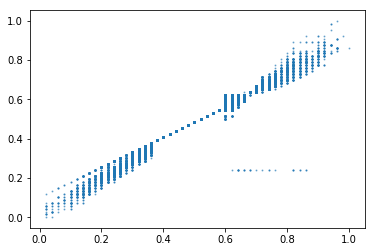

In [7]:
plt.scatter(bikes['temp'], bikes['atemp'], alpha=0.5, s=1)

Below, we plot the distributions of each of the feautures to get an idea of what data we actually have. The particular insights I'd like to point out are:
 - the distribution of weathersit is highly skewed: a vast majority of the samples were taken at weathersit=1, which encodes the least shit weather. In contrast, the shittest weather (4) has almost no representation, so we should stratify our sampling with respect to this accordingly.
 - there is almost no presence of holidays, so we must think about whether we want to keep this feature. I suspect that it is entirely redundant with workingday (in the sense that $\mathbb{P}(\mathrm{workingday}|\mathrm{holiday}) = 1$, with the additional fact that there should be little difference between holidays and week-ends.)
 - due to the reasonably large sample size we shouldn't need to stratify the sampling with respect to the indicator of workingday, since we should expect that with the distribution being roughly $\left(\frac{1}{3}, \frac{2}{3} \right)$ we would get a representative sample anyway.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c3959518>,
      dtype=object)

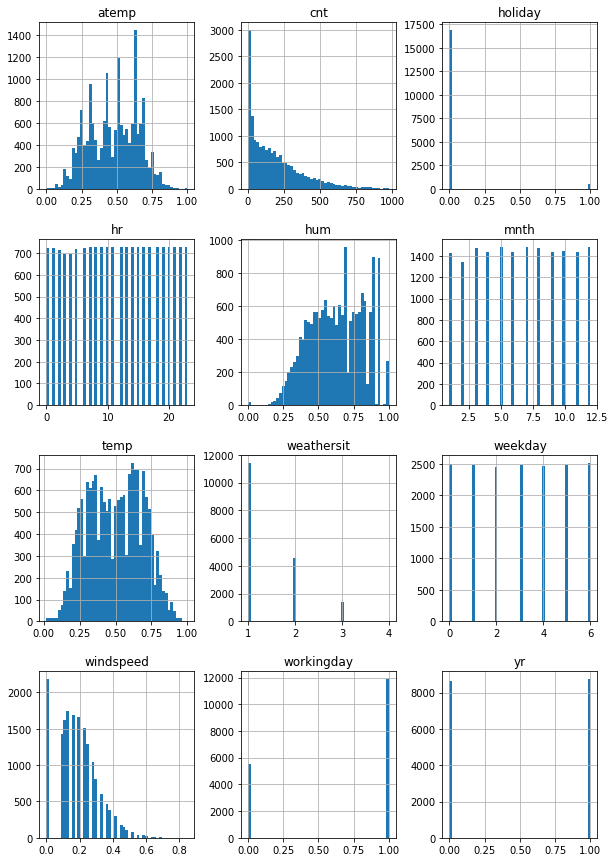

In [8]:
%matplotlib inline
bikes.hist(bins=50, figsize=(10, 15))

We also plot the distributions of the interesting features against one another, with the following insghts:
 - the particularly strong correlations detected above are definitely visible here, too. temperature certainly seems to positively affect cnt, whereas humidity seems to negatively affect it. 
 - there certainly seems to be a pattern in the hr-cnt relationship, which was to be expected. The shape of the curve, however, seems to suggest that we should use polynomial features, at least of degree 3 to accomodate for this pattern though.
 - the windspeed seems to affect cnt in the opposite direction from what the above suggested, which is interesting
 - the week day seems to have little correlation with the value of cnt, as had been expected before. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c36bcda0>,
      dtype=object)

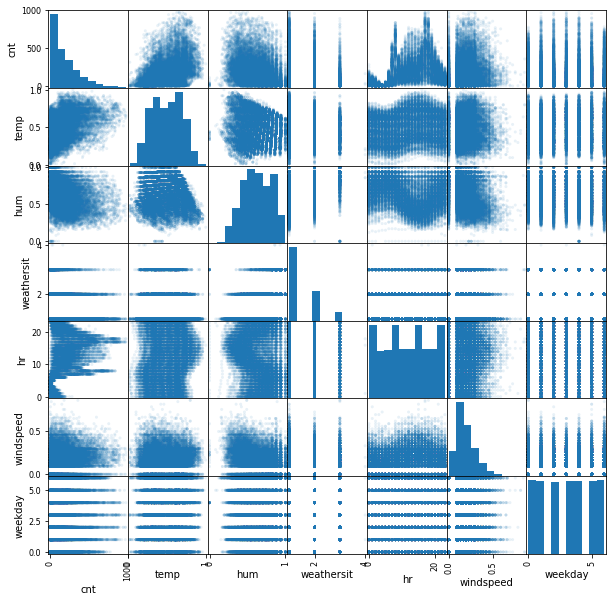

In [9]:
features = ['cnt', 'temp', 'hum', 'weathersit', 'hr', 'windspeed', 'weekday']
pd.plotting.scatter_matrix(bikes[features], figsize=(10,10), alpha=0.1)

Now, note that the relationship between hr and cnt has a slightly peculiar shape, with the peak in the mid-day hours seeming more sparse that the two peaks around it. For an explanation, observe the scatter plots below:

 - two days in particular have the shape responsible for the peak around mid-day; these days being the 'first' and the 'last' days of the week. (fucking Americans...)
   * This may be explained by rush hour traffic on working days vs free time in the pleasant hours of day on week-ends
 - the shading of each of the vertices indicates whether the datum was collected on a working day, as you can see, the information about this clearly leads to the two different shapes, as is illustrated by the fact that some week-days were non-working days as well, which led to these having the same qualitative distribution as week-ends.
 
This insight means that it might be beneficial splitting the hour feature into one that combines hour and working day to ensure that the model does not interpolate between the two different shapes when considering the hour feature.

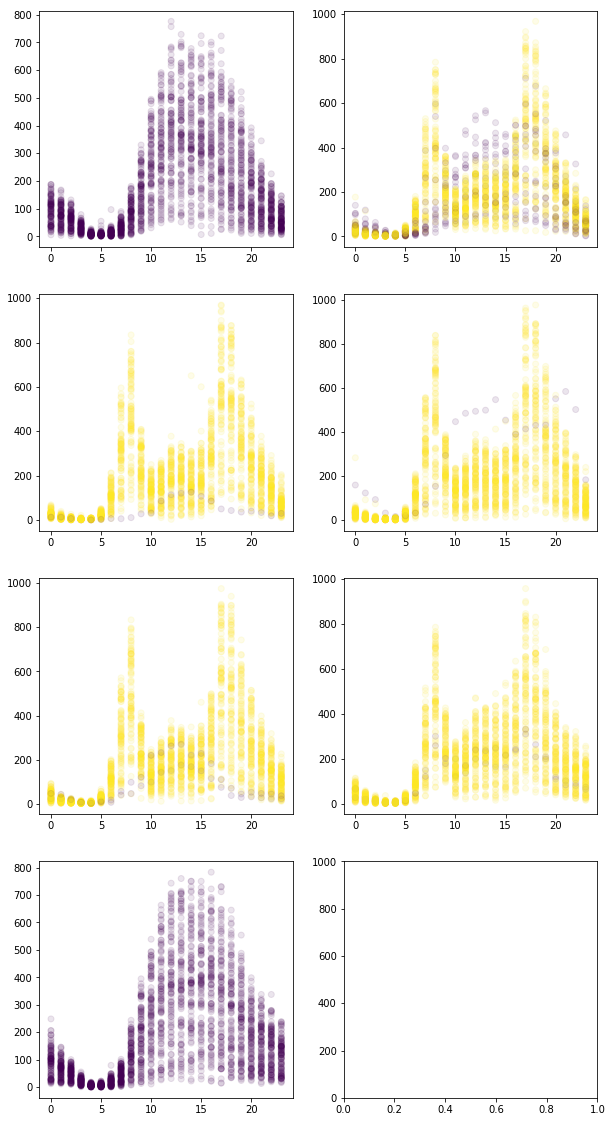

In [10]:
fig, axes = plt.subplots(4,2, figsize=(10,20))

i = 0
for ax in axes.reshape((8,))[:-1]:
    bikes_ = bikes.loc[bikes['weekday'] == i]
    ax.scatter(bikes_['hr'], y=bikes_['cnt'], alpha=0.1, c=bikes_['workingday'])
    plt.ylim(0,1000)
    i += 1

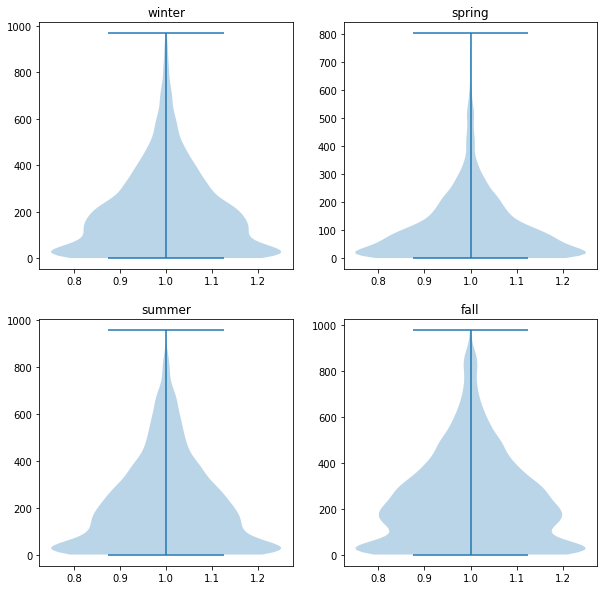

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
seasons = ['winter', 'spring', 'summer', 'fall']
for i,ax in enumerate(axes.reshape((4,))):
    bikes_ = bikes.loc[bikes['season'] == seasons[i]]
    ax.violinplot(bikes_['cnt'])
    ax.set_title(seasons[i])

Now, observe that the distribution among bike rentals suggests (this conflates all values for hr, which is suboptimal) suggests that, in spring in particular, much fewer bike rentals occur, with none of the other seasons having such an impact, and each of the other seasons having comparable distributions. 
Since we will have to somehow map the categorical feature `season` to a numerical value, and since there is no really discernible trend chronologically, we might expect one-hot encoding to perform better for this data set than giving each caegory a numerical value.

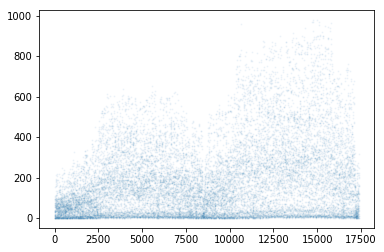

In [12]:
ys = bikes['cnt']
plt.scatter(x=range(len(bikes)), y=ys, alpha=0.05, s=1)


Finally, the above plot demonstrates that, indeed, the number of hourly bike rentals did become somewhat larger with time, also exhibiting an expected drop for the winter period.

# Modelling

### Preparation

We shall first need to split the data set into our training set, our development set, and our test set. 
With these, we shall infomr our model, tune metadecisions about the model, and finally test its quality, respecitvely.
We will split these as 60/20/20, and use stratified splitting with respect to the weather situation.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

split1 = StratifiedShuffleSplit(test_size = 0.4, random_state=28)
for train_index, test_index in split1.split(bikes, bikes['weathersit']):
    strat_trainset = bikes.loc[train_index].drop('cnt', axis=1)
    strat_train_labels = bikes.loc[train_index]['cnt']
    strat_devset = bikes.loc[test_index[0::2]].drop('cnt', axis=1)
    strat_dev_labels = bikes.loc[test_index[0::2]]['cnt']
    strat_testset = bikes.loc[test_index[1::2]].drop('cnt', axis=1)
    strat_test_labels = bikes.loc[test_index[1::2]]['cnt']

In [14]:
strat_trainset.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
6183,fall,0,9,5,0,2,1,2,0.54,0.5152,0.88,0.1940
3316,summer,0,5,2,0,1,1,3,0.56,0.5303,0.88,0.1642
15165,winter,1,9,2,0,6,0,2,0.54,0.5152,0.56,0.2239
4127,fall,0,6,21,0,6,0,1,0.68,0.6364,0.51,0.1642
14092,fall,1,8,9,0,3,1,2,0.72,0.6818,0.62,0.1940


### Transformations for machine learning algs

Now, we will build a preprocessing pipeline to prepare all the features we will want in our model.
The first step will be encoding the season as 4 1-hot features.

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['season']
num_features = list(strat_trainset.drop(cat_features, axis=1))

In [16]:
list(enumerate(num_features))

[(0, 'yr'),
 (1, 'mnth'),
 (2, 'hr'),
 (3, 'holiday'),
 (4, 'weekday'),
 (5, 'workingday'),
 (6, 'weathersit'),
 (7, 'temp'),
 (8, 'atemp'),
 (9, 'hum'),
 (10, 'windspeed')]

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class CustomLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, X, y=0):
        self.encoder.fit(X)
        return self
    def transform(self, X, y=0):
        return self.encoder.transform(X)

In [18]:
columns = dict(map(lambda p: p[::-1], list(enumerate(num_features))))
class ColumnSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, c_to_split, indicator_to_split_by):
        self.split = columns[c_to_split]
        self.indicator = columns[indicator_to_split_by]
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        split_col = X[:, self.split]
        ind_col = X[:, self.indicator]
        return np.c_[X[:, :self.split], np.transpose(split_col*ind_col), np.transpose(split_col*(1-ind_col)), X[:, self.split+1:]]

In [19]:
sample = strat_trainset[num_features].head().copy()
splitter = ColumnSplitter('hr', 'workingday')
attribs = splitter.transform(sample.values)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_features)),
    ('norm_scaler', MinMaxScaler()),
    ('splitter', ColumnSplitter('hr', 'workingday'))
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_features)),
    ('one-hotter', CustomLabelBinarizer())
])

In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

training_features = full_pipeline.fit_transform(strat_trainset)
dev_features = full_pipeline.fit_transform(strat_devset)
test_features = full_pipeline.fit_transform(strat_testset)

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_features, strat_train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
from sklearn.metrics import mean_squared_error

bike_preds = lin_reg.predict(full_pipeline.fit_transform(strat_devset))
lin_mse = mean_squared_error(strat_dev_labels, bike_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

140.55186341338856

In [24]:
from sklearn.preprocessing import PolynomialFeatures


model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model = model.fit(training_features, strat_train_labels)


110.61056367114153


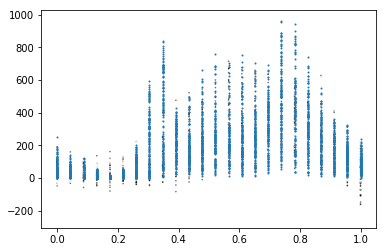

In [25]:
bike_preds = model.predict(test_features)
lin_mse = mean_squared_error(strat_test_labels, bike_preds)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
plt.scatter(x=test_features[:,2]+test_features[:,3], y=bike_preds, s=0.4, alpha=0.5, c=test_features[:,6], cmap='gray')
plt.scatter(x=test_features[:,2]+test_features[:,3], y=strat_test_labels, s=1, alpha=1)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline([
    ('selector', DataFrameSelector(num_features)),
    ('norm_scaler', MinMaxScaler()),
    
])
cat_pipeline2 = Pipeline([
    ('selector', DataFrameSelector(cat_features)),
    ('one-hotter', CustomLabelBinarizer())
])

In [27]:
from sklearn.pipeline import FeatureUnion

full_pipeline2 = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline2),
        ("cat_pipeline", cat_pipeline2),
    ])

training_features2 = full_pipeline2.fit_transform(strat_trainset)
dev_features2 = full_pipeline2.fit_transform(strat_devset)
test_features2 = full_pipeline2.fit_transform(strat_testset)

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_features2, strat_train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.metrics import mean_squared_error

bike_preds = lin_reg.predict(full_pipeline2.fit_transform(strat_devset))
lin_mse = mean_squared_error(strat_dev_labels, bike_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

140.6015800086208

In [30]:
from sklearn.preprocessing import PolynomialFeatures


model2 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model2 = model2.fit(training_features2, strat_train_labels)


628624804.2519705


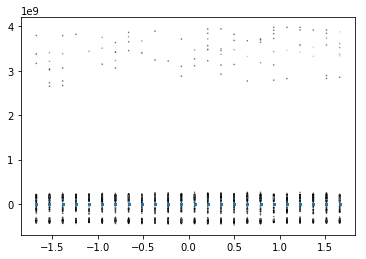

In [31]:
bike_preds = model2.predict(test_features2)
lin_mse = mean_squared_error(strat_test_labels, bike_preds)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
plt.scatter(x=test_features2[:,2], y=bike_preds, s=0.4, alpha=0.5, c=test_features2[:,6], cmap='gray')
plt.scatter(x=test_features2[:,2], y=strat_test_labels, s=1, alpha=1)

In [32]:
from sklearn.model_selection import cross_val_score

def analyse_cv(model):   
    scores = cross_val_score(model, training_features2, strat_train_labels,
                             scoring = "neg_mean_squared_error", cv=10)

    # cross-validation expects utility function (greater is better)
    # rather than cost function (lower is better), so the scores returned
    # are negative as they are the opposite of MSE
    sqrt_scores = np.sqrt(-scores) 
    print("Scores:", sqrt_scores)
    print("Mean:", sqrt_scores.mean())
    print("Standard deviation:", sqrt_scores.std())

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg = tree_reg.fit(training_features2, strat_train_labels)
housing_predictions = tree_reg.predict(dev_features2)
tree_mse = mean_squared_error(strat_dev_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

61.23670095868815

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
analyse_cv(forest_reg)

/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensem

Scores: [45.9860192  44.90984737 51.78793379 47.86452308 48.52012839 46.31078773
 45.00926846 42.3143638  49.14799071 45.21306352]
Mean: 46.70639260522986
Standard deviation: 2.5439646368303515


In [35]:
analyse_cv(model)

Scores: [109.42393679 111.85296522 108.63874545 115.20815356 109.02272545
 109.48373742 109.67912136  99.71719617 111.1474105  114.00389381]
Mean: 109.81778857312199
Standard deviation: 3.9600444821405834


In [36]:
analyse_cv(tree_reg)

Scores: [59.84669613 62.89677126 68.54969294 61.60411605 62.3131108  59.67786848
 60.57607754 58.46328843 63.63538019 64.24541516]
Mean: 62.18084169780078
Standard deviation: 2.7552069884648414


In [42]:
from sklearn.model_selection import GridSearchCV

# specify the range of hyperparameter values for the grid search to try out 
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8,10,12,15]}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")
grid_search.fit(training_features, strat_train_labels)

grid_search.best_params_

{'max_features': 12, 'n_estimators': 30}

In [43]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

104.06231596878246 {'max_features': 2, 'n_estimators': 3}
86.3121343081628 {'max_features': 2, 'n_estimators': 10}
82.01190762669674 {'max_features': 2, 'n_estimators': 30}
81.32414750020908 {'max_features': 4, 'n_estimators': 3}
67.29659349770667 {'max_features': 4, 'n_estimators': 10}
63.251941050215706 {'max_features': 4, 'n_estimators': 30}
65.49198030887268 {'max_features': 6, 'n_estimators': 3}
55.439472095824165 {'max_features': 6, 'n_estimators': 10}
51.52524850734412 {'max_features': 6, 'n_estimators': 30}
60.17600934239231 {'max_features': 8, 'n_estimators': 3}
48.05965584359041 {'max_features': 8, 'n_estimators': 10}
46.289302744193584 {'max_features': 8, 'n_estimators': 30}
54.321814212861284 {'max_features': 10, 'n_estimators': 3}
46.9553961652318 {'max_features': 10, 'n_estimators': 10}
44.57915088803511 {'max_features': 10, 'n_estimators': 30}
52.93793771540259 {'max_features': 12, 'n_estimators': 3}
46.326103127047524 {'max_features': 12, 'n_estimators': 10}
44.28174996

In [44]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.08601351, 0.02182483, 0.40340302, 0.20548642, 0.00238101,
       0.01120402, 0.00837038, 0.01458692, 0.06253006, 0.10853414,
       0.04077647, 0.01155819, 0.00103114, 0.01595504, 0.00127736,
       0.00506749])

In [47]:
final_model = grid_search.best_estimator_
y_test = strat_test_labels
X_test = full_pipeline.transform(strat_testset)

preds = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, preds))
final_rmse

45.235618222092164

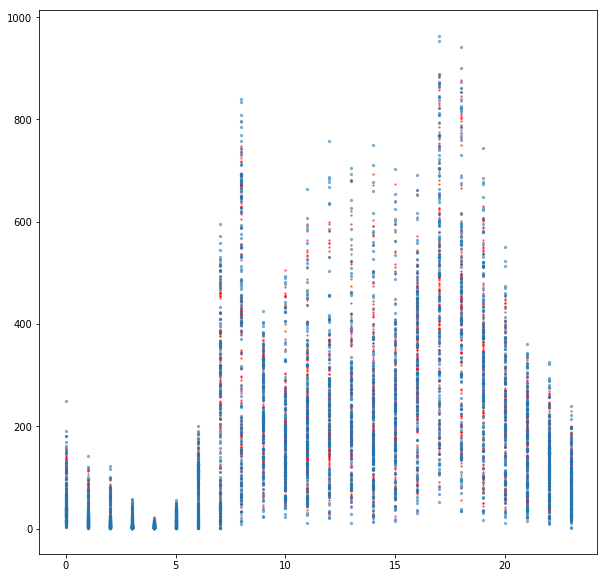

In [60]:
plt.subplots(figsize=(10,10))
plt.scatter(x=23*(test_features[:,2]+test_features[:,3]), y=preds, s=2, alpha=0.5, c='red')
plt.scatter(x=23*(test_features[:,2]+test_features[:,3]), y=strat_test_labels, s=5, alpha=0.5)